Comparação entre classificadores
**Nome:** George Sanders Carvalho Araújo

**URL do dataset:** https://www.kaggle.com/ronitf/heart-disease-uci

##Preparação

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

from numpy.random import seed
from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
%matplotlib inline

##Dataset

In [ ]:
# autenticar usuário
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&state=jTxLxDFxyWIUH9bMcTjF9eGbHzE1q6&prompt=consent&access_type=offline&code_challenge=TiioVa6fjUQn33QIlx7Wmdp4FPb6uFOFVguuK43kBoU&code_challenge_method=S256

Enter verification code: 4/1AX4XfWg-Y_tkivrk7gxYAg_OrQellVTaFp6pj7NS9o6MRu5MBLl15Frtj4A


In [ ]:
downloaded = drive.CreateFile({'id':"1fpWMQLa-TTuLOjidXtD4S4mfYtX8kOmJ"})
downloaded.GetContentFile('heart.csv')
df_heart = pd.read_csv('heart.csv')

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df_heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


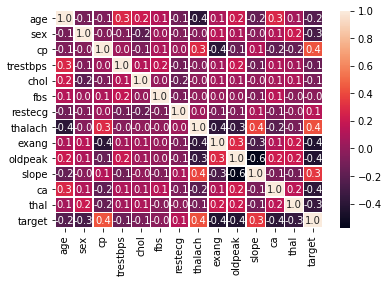

In [ ]:
plot = sb.heatmap(df_heart.corr(), annot = True, fmt=".1f", linewidths=.6)
plot

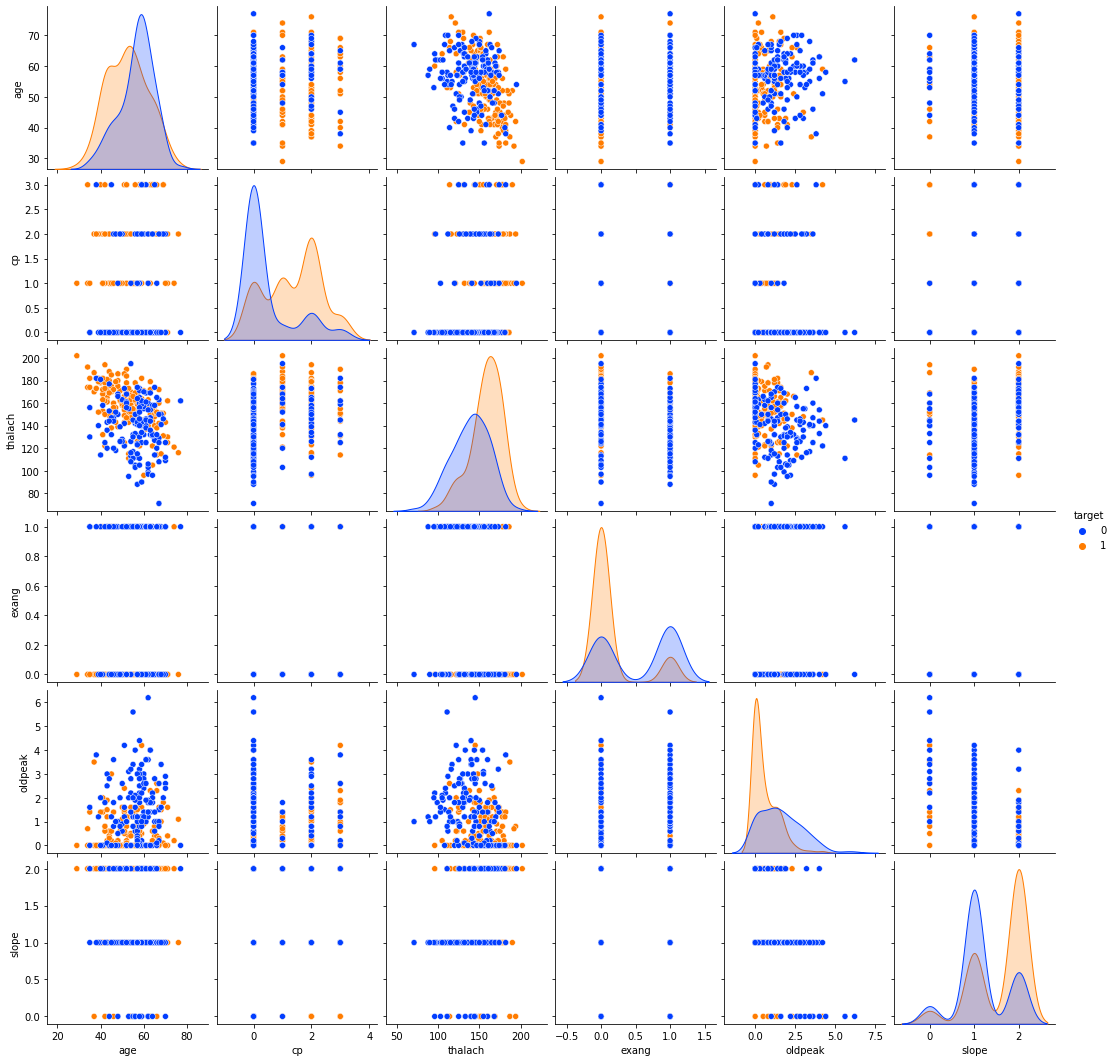

In [ ]:
sb.set_palette("bright")
sb.pairplot(df_heart[['age','cp','thalach','exang','oldpeak','slope','target']],hue='target')

##Separação entre dados de Treino e Teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_heart.drop("target",1), df_heart.target, test_size=0.30,random_state=109)

##NaiveBayes

###Treinamento

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

###Modelo Aprendido

In [ ]:
list(zip(df_heart.columns,clf.theta_[0]))

[('age', 57.234693877551024),
 ('sex', 0.826530612244898),
 ('cp', 0.5714285714285714),
 ('trestbps', 136.26530612244898),
 ('chol', 249.58163265306123),
 ('fbs', 0.16326530612244897),
 ('restecg', 0.41836734693877553),
 ('thalach', 139.9387755102041),
 ('exang', 0.5408163265306123),
 ('oldpeak', 1.5255102040816324),
 ('slope', 1.1938775510204083),
 ('ca', 1.183673469387755),
 ('thal', 2.5306122448979593)]

In [ ]:
list(zip(df_heart.columns,clf.theta_[1]))

[('age', 51.74561403508772),
 ('sex', 0.5614035087719298),
 ('cp', 1.412280701754386),
 ('trestbps', 129.6578947368421),
 ('chol', 239.8684210526316),
 ('fbs', 0.11403508771929824),
 ('restecg', 0.5789473684210527),
 ('thalach', 159.0701754385965),
 ('exang', 0.14912280701754385),
 ('oldpeak', 0.6131578947368425),
 ('slope', 1.5614035087719298),
 ('ca', 0.34210526315789475),
 ('thal', 2.0964912280701755)]

In [ ]:
clf.sigma_

array([[6.38122685e+01, 1.43380569e-01, 9.59186483e-01, 3.40725534e+02,
        2.55240660e+03, 1.36612555e-01, 2.63747083e-01, 5.69832989e+02,
        2.48336837e-01, 1.60476020e+00, 3.39965325e-01, 1.00708319e+00,
        4.12331006e-01],
       [9.84002029e+01, 2.46232419e-01, 8.91430941e-01, 2.91926826e+02,
        2.98686865e+03, 1.01033896e-01, 2.61313982e-01, 3.72065254e+02,
        1.26888005e-01, 7.25706872e-01, 3.69039436e-01, 6.81212412e-01,
        2.09990498e-01]])

###Avaliação do Modelo

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))  

[[34  6]
 [ 7 44]]


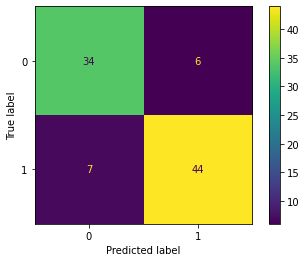

In [ ]:
plot_confusion_matrix(clf,X_test,y_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        40
           1       0.88      0.86      0.87        51

    accuracy                           0.86        91
   macro avg       0.85      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91



In [ ]:
clf.score(X_test,y_test)

0.8571428571428571

##LogisticRegression

###Treinamento

In [ ]:
logreg = linear_model.LogisticRegression(C=1e5, max_iter=1200)

In [ ]:
logreg.fit(X_train, y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###Avaliação do Modelo

In [ ]:
y_pred_logreg = logreg.predict(X_test)
cfm_logreg = confusion_matrix(y_test,y_pred_logreg)

In [ ]:
cfm_logreg

array([[32,  5],
       [ 9, 45]])

In [ ]:
print(classification_report(y_pred_logreg,y_test))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.83      0.90      0.87        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



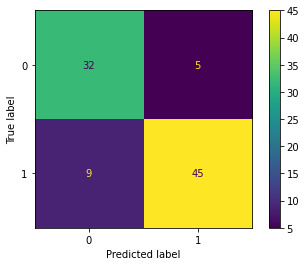

In [ ]:
plot_confusion_matrix(logreg,X_test,y_test)

In [ ]:
logreg.score(X_test,y_test)

0.8461538461538461

###Cross-Validation Score

In [ ]:
cv_logreg = cross_val_score(logreg, X_train, y_train, cv=5)
cv_logreg

array([0.81395349, 0.79069767, 0.80952381, 0.73809524, 0.85714286])

0.83 accuracy with a standard deviation of 0.05


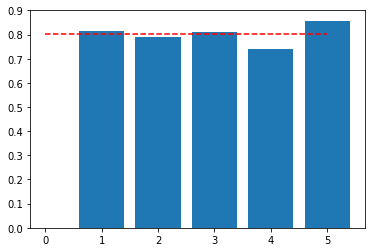

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
plt.bar(np.arange(1,6),cv_logreg)
plt.plot([0,5],[cv_logreg.mean(),cv_logreg.mean()],'r--')

##K-Nearest Neighbor(KNN)

###Treinamento

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

###Avaliação do Modelo

In [ ]:
y_pred_knn= knn.predict(X_test)
cfm_knn = confusion_matrix(y_test,y_pred_knn)

In [ ]:
cfm_knn

array([[25, 17],
       [12, 37]])

In [ ]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.60      0.68      0.63        37
           1       0.76      0.69      0.72        54

    accuracy                           0.68        91
   macro avg       0.68      0.68      0.68        91
weighted avg       0.69      0.68      0.68        91



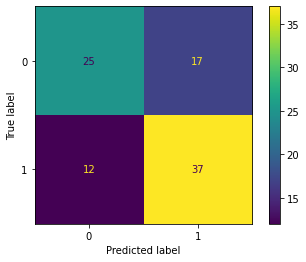

In [ ]:
plot_confusion_matrix(clf_knn,X_test,y_test)

In [ ]:
clf_knn.score(X_test,y_test)

0.6813186813186813

##SVM

###Treinamento

In [ ]:
clf_svm = svm.SVC(kernel='linear')

In [ ]:
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

###Avaliação do Modelo

In [ ]:
y_pred_svm = clf_svm.predict(X_test)
cfm_svm = confusion_matrix(y_test,y_pred_svm)

In [ ]:
cfm_svm

array([[35,  5],
       [ 4, 47]])

In [ ]:
print(classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.92      0.90      0.91        52

    accuracy                           0.90        91
   macro avg       0.90      0.90      0.90        91
weighted avg       0.90      0.90      0.90        91



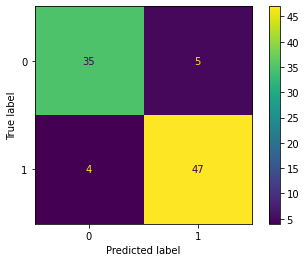

In [ ]:
plot_confusion_matrix(clf_svm,X_test,y_test)

In [ ]:
clf_svm.score(X_test,y_test)

0.9010989010989011

###Avaliando hiperparâmetros do SVM

In [ ]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

#rng = np.random.RandomState(0)
#X, y = datasets.make_classification(n_samples=1000, random_state=rng)


clf = svm.SVC(kernel="rbf" , probability = True, cache_size = 600)

gamma_range = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1e0,1e1]
c_range = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5]
param_grid = dict(gamma = gamma_range, C = c_range)

grid = GridSearchCV(clf, param_grid, cv= 10, scoring="accuracy", n_jobs = -1)
%time grid.fit(X_train,y_train)

CPU times: user 1.47 s, sys: 69.1 ms, total: 1.54 s
Wall time: 28.8 s


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=600,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
                               10000.0, 100000.0],
                         'gamma': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
print(grid.best_estimator_)

SVC(C=100000.0, break_ties=False, cache_size=600, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-07, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
clf_svm = svm.SVC(C=100000.0, break_ties=False, cache_size=600, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-07, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
clf_svm.fit(X_train, y_train)

SVC(C=100000.0, break_ties=False, cache_size=600, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1e-07, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred_svm = clf_svm.predict(X_test)
cfm_svm = confusion_matrix(y_test,y_pred_svm)

In [ ]:
cfm_svm

array([[33,  7],
       [ 2, 49]])

In [ ]:
print(classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.96      0.88      0.92        56

    accuracy                           0.90        91
   macro avg       0.89      0.91      0.90        91
weighted avg       0.91      0.90      0.90        91



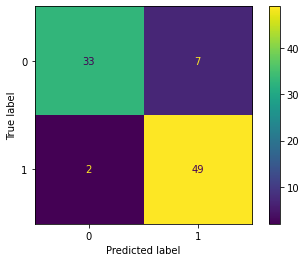

In [ ]:
plot_confusion_matrix(clf_svm,X_test,y_test)

In [ ]:
clf_svm.score(X_test,y_test)

0.9010989010989011